In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from prettytable import PrettyTable
import pandas as pd
from sympy import symbols, sin, cos, diff, Matrix, solve
import math
from scipy import integrate
from scipy.integrate import odeint

# 1 блок «Решение нелинейных уравнений и их систем»

## Задание 1

Решить нелинейное уравнение: 2.74 * x³ - 1.93 * x² - 15.28 * x - 3.72

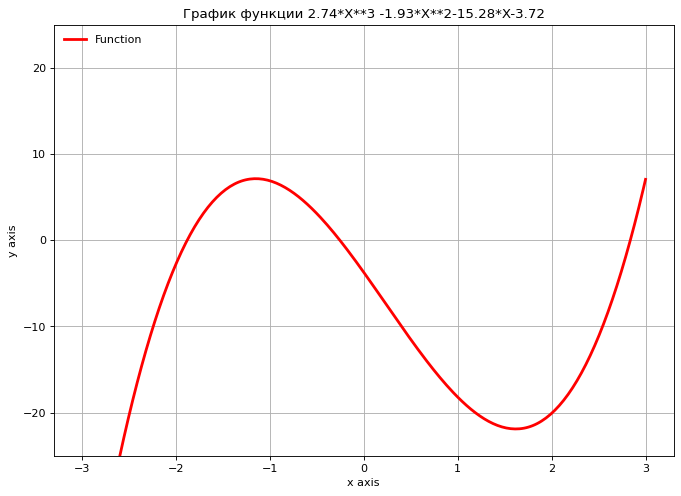

In [68]:
plt.figure(figsize=(10, 7), dpi=80)
X = np.linspace(-3, 3, 256, endpoint=True)
F = 2.74 * X * X * X - 1.93 * X * X - 15.28 * X - 3.72
plt.plot(X, F, color="red", linewidth=2.5, linestyle="-", label="Function");
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.ylim(-25, 25)

plt.title('График функции 2.74*X**3 -1.93*X**2-15.28*X-3.72')
plt.legend(loc='upper left', frameon=False)
plt.grid()
plt.show()

◦ Метод половинного деления

    Iteration      Left     Right
0           0 -2.000000 -1.000000
1           1 -2.000000 -1.500000
2           2 -2.000000 -1.750000
3           3 -2.000000 -1.875000
4           4 -1.937500 -1.875000
5           5 -1.906250 -1.875000
6           6 -1.890625 -1.875000
7           7 -1.882812 -1.875000
8           8 -1.882812 -1.878906
9           9 -1.880859 -1.878906
10         10 -1.879883 -1.878906
11         11 -1.879395 -1.878906
12         12 -1.879150 -1.878906
X = -1.87896728515625
    Iteration      Left     Right
0           0 -1.000000  0.000000
1           1 -0.500000  0.000000
2           2 -0.500000 -0.250000
3           3 -0.375000 -0.250000
4           4 -0.312500 -0.250000
5           5 -0.281250 -0.250000
6           6 -0.265625 -0.250000
7           7 -0.257812 -0.250000
8           8 -0.257812 -0.253906
9           9 -0.255859 -0.253906
10         10 -0.254883 -0.253906
11         11 -0.254883 -0.254395
X = -0.2545166015625
    Iteration      Left     Right
0    

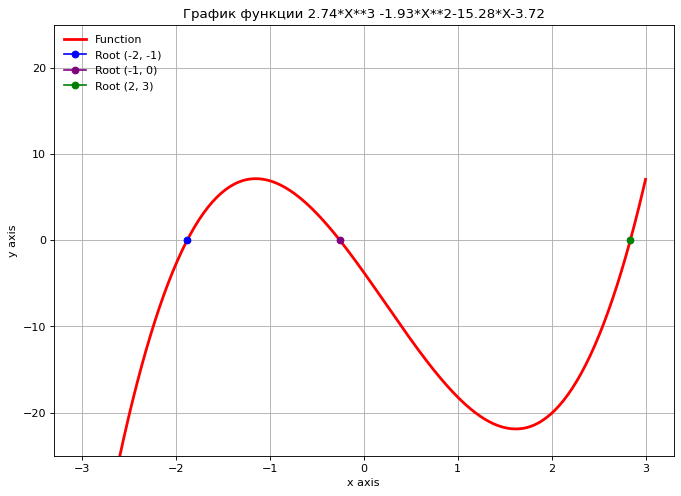

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def xFun(x):
    return 2.74 * x**3 - 1.93 * x**2 - 15.28 * x - 3.72

def halfDiv(left, right):
    iterations = 0
    table = []
    
    table.append([iterations, left, right])
    while True:
        middle = (right + left) / 2
        if xFun(left) * xFun(middle) < 0:
            right = middle
        elif xFun(right) * xFun(middle) < 0:
            left = middle
        if abs(xFun(middle)) < 0.001:
            break
        iterations += 1
        table.append([iterations, left, right])
    
    df = pd.DataFrame(table, columns=["Iteration", "Left", "Right"])
    print(df)
    print("X =", (right + left) / 2)
    return (right + left) / 2

plt.figure(figsize=(10, 7), dpi=80)
X = np.linspace(-3, 3, 256, endpoint=True)
F = 2.74 * X**3 - 1.93 * X**2 - 15.28 * X - 3.72
plt.plot(X, F, color="red", linewidth=2.5, linestyle="-", label="Function")
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.ylim(-25, 25)

x = halfDiv(-2, -1)
plt.plot(x, xFun(x), color="blue", marker="o", label="Root (-2, -1)")
x = halfDiv(-1, 0)
plt.plot(x, xFun(x), color="purple", marker="o", label="Root (-1, 0)")
x = halfDiv(2, 3)
plt.plot(x, xFun(x), color="green", marker="o", label="Root (2, 3)")

plt.title('График функции 2.74*X**3 -1.93*X**2-15.28*X-3.72')
plt.legend(loc='upper left', frameon=False)
plt.grid()
plt.show()

◦ Метод хорд

   Iteration        x0        x1     x_new   f(x_new)
0          0 -2.000000 -1.000000 -1.711042   3.048685
1          1 -1.000000 -1.711042 -2.275366 -11.222401
2          2 -1.711042 -2.275366 -1.831597   0.956087
3          3 -2.275366 -1.831597 -1.866435   0.260671
4          4 -1.831597 -1.866435 -1.879494  -0.010766
5          5 -1.866435 -1.879494 -1.878976   0.000113
X = -1.878976482038928
   Iteration        x0        x1     x_new  f(x_new)
0          0 -1.000000  0.000000 -0.350613  1.282012
1          1  0.000000 -0.350613 -0.260751  0.084474
2          2 -0.350613 -0.260751 -0.254412 -0.002623
3          3 -0.260751 -0.254412 -0.254603  0.000005
X = -0.2546029845543272
   Iteration        x0        x1     x_new  f(x_new)
0          0  2.000000  3.000000  2.740140 -3.707788
1          1  3.000000  2.740140  2.829704 -0.328709
2          2  2.740140  2.829704  2.838416  0.018074
3          3  2.829704  2.838416  2.837962 -0.000080
X = 2.8379620444834326


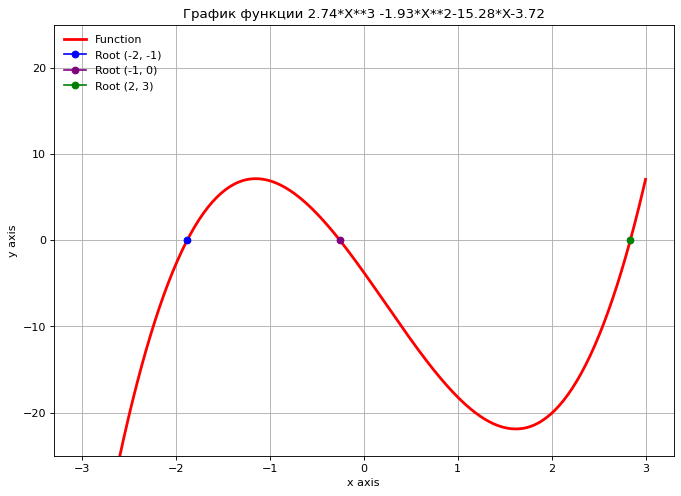

In [70]:
def chord_method(f, left, right, tol=1e-3, max_iter=1000):
    iterations = 0
    table = []
    
    x0 = left
    x1 = right
    
    while iterations < max_iter:
        f_x0 = f(x0)
        f_x1 = f(x1)
        x_new = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        f_x_new = f(x_new)
        
        table.append([iterations, x0, x1, x_new, f_x_new])
        
        if abs(f_x_new) < tol:
            break
        
        x0, x1 = x1, x_new
        iterations += 1
    
    df = pd.DataFrame(table, columns=['Iteration', 'x0', 'x1', 'x_new', 'f(x_new)'])
    print(df)
    print("X =",x_new)
    return x_new

# Построение графика функции
plt.figure(figsize=(10, 7), dpi=80)
X = np.linspace(-3, 3, 256, endpoint=True)
F = xFun(X)
plt.plot(X, F, color="red", linewidth=2.5, linestyle="-", label="Function")
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.ylim(-25, 25)

# Применение метода хорд для различных интервалов
x = chord_method(xFun, -2, -1)
plt.plot(x, xFun(x), color="blue", marker="o", label="Root (-2, -1)")
x = chord_method(xFun, -1, 0)
plt.plot(x, xFun(x), color="purple", marker="o", label="Root (-1, 0)")
x = chord_method(xFun, 2, 3)
plt.plot(x, xFun(x), color="green", marker="o", label="Root (2, 3)")

plt.title('График функции 2.74*X**3 -1.93*X**2-15.28*X-3.72')
plt.legend(loc='upper left', frameon=False)
plt.grid()
plt.show()

◦ Метод Ньютона

   Iteration      Left  Right
0          0 -2.000000     -1
1          1 -2.122987     -1
2          2 -1.916165     -1
3          3 -1.880072     -1
X = -1.8789828298084388
   Iteration  Left     Right
0          0    -1  0.000000
1          1    -1 -0.225985
2          2    -1 -0.254376
X = -0.2546026251254184
   Iteration  Left     Right
0          0     2  3.000000
1          1     2  2.922386
2          2     2  2.841534
X = 2.837970853731298


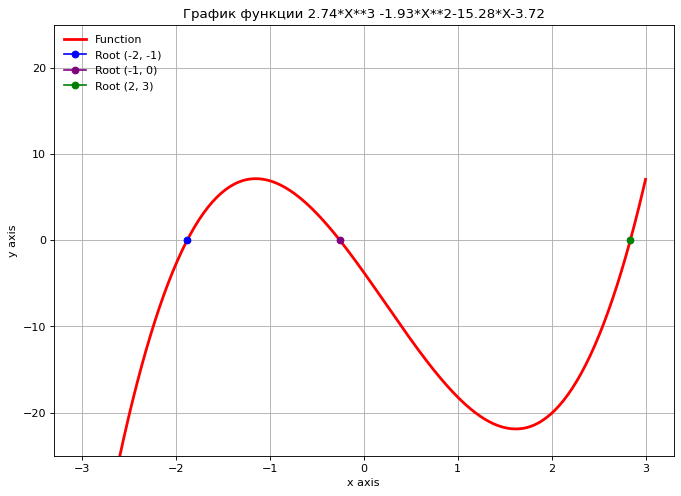

In [71]:
def dx_func(x):
    return 8.22 * x**2 - 3.86 * x - 15.28

def newton_method(left, right, tol=1e-3, max_iter=100):
    iterations = 0
    table = []
    
    # Выбор начального приближения
    x = (left + right) / 2
    
    while iterations < max_iter:
        f_x = xFun(x)
        f_prime_x = dx_func(x)
        
        if f_prime_x == 0:
            print("Производная равна нулю. Метод не применим.")
            return None
        
        x_new = x - f_x / f_prime_x
        
        table.append([iterations, left, right])
        
        if abs(xFun(x_new)) < tol:
            x = x_new
            break
        
        if xFun(left) * xFun(x_new) < 0:
            right = x_new
        else:
            left = x_new

        x = x_new
        iterations += 1
    
    df = pd.DataFrame(table, columns=['Iteration', 'Left', 'Right'])
    print(df)
    print("X =",x)
    return x

plt.figure(figsize=(10, 7), dpi=80)
X = np.linspace(-3, 3, 256, endpoint=True)
F = xFun(X)
plt.plot(X, F, color="red", linewidth=2.5, linestyle="-", label="Function")
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.ylim(-25, 25)

# Применение метода Ньютона для различных интервалов
x = newton_method(-2, -1)
plt.plot(x, xFun(x), color="blue", marker="o", label="Root (-2, -1)")
x = newton_method(-1, 0)
plt.plot(x, xFun(x), color="purple", marker="o", label="Root (-1, 0)")
x = newton_method(2, 3)
plt.plot(x, xFun(x), color="green", marker="o", label="Root (2, 3)")

plt.title('График функции 2.74*X**3 -1.93*X**2-15.28*X-3.72')
plt.legend(loc='upper left', frameon=False)
plt.grid()
plt.show()

◦ Метод последовательных приближений

    Iteration         x  Left  Right
0           0 -1.500000    -2     -1
1           1 -1.556100    -2     -1
2           2 -1.606695    -2     -1
3           3 -1.651530    -2     -1
4           4 -1.690615    -2     -1
5           5 -1.724179    -2     -1
6           6 -1.752617    -2     -1
7           7 -1.776427    -2     -1
8           8 -1.796159    -2     -1
9           9 -1.812371    -2     -1
10         10 -1.825593    -2     -1
11         11 -1.836310    -2     -1
12         12 -1.844954    -2     -1
13         13 -1.851898    -2     -1
14         14 -1.857457    -2     -1
15         15 -1.861896    -2     -1
16         16 -1.865432    -2     -1
17         17 -1.868245    -2     -1
18         18 -1.870479    -2     -1
19         19 -1.872252    -2     -1
20         20 -1.873657    -2     -1
21         21 -1.874770    -2     -1
X = -1.8756510348471211
   Iteration     x  Left  Right
0          0 -0.25  -0.5      0
X = -0.249365625
    Iteration         x  Left  Right
0      

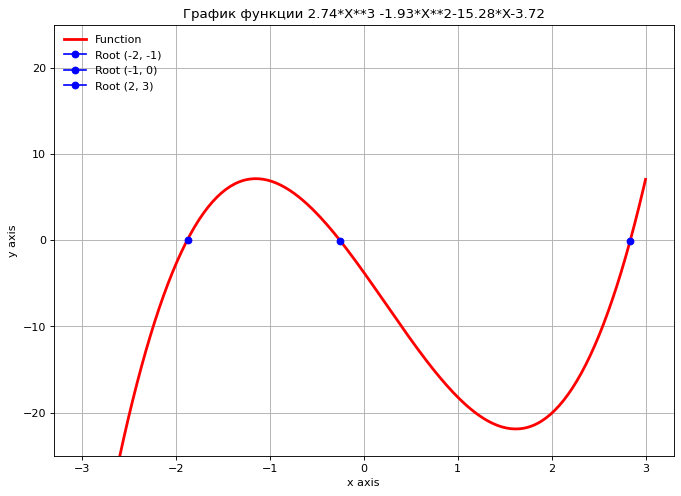

In [72]:
def F(x, alpha=0.01):
    return x - alpha * xFun(x)

# Метод последовательных приближений
def fixed_point_iteration(left, right, tol=1e-3, max_iter=100, alpha=0.01):
    iterations = 0
    table = []

    # Выбор начального приближения
    x = (left + right) / 2

    while iterations < max_iter:
        x_new = F(x, alpha)
        table.append([iterations, x, left, right])

        if abs(x_new - x) < tol:
            x = x_new
            break

        x = x_new
        iterations += 1

    df = pd.DataFrame(table, columns=['Iteration', 'x', 'Left', 'Right'])
    print(df)
    print("X =",x)
    return x


plt.figure(figsize=(10, 7), dpi=80)
X = np.linspace(-3, 3, 256, endpoint=True)
F_values = xFun(X)
plt.plot(X, F_values, color="red", linewidth=2.5, linestyle="-", label="Function")
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.ylim(-25, 25)

# Применение метода последовательных приближений для различных интервалов
x = fixed_point_iteration(-2, -1, alpha=0.01)
plt.plot(x, xFun(x), color="blue", marker="o", label="Root (-2, -1)")
x = fixed_point_iteration(-0.5, 0, alpha=0.01)
plt.plot(x, xFun(x), color="blue", marker="o", label="Root (-1, 0)")
x = fixed_point_iteration(2, 3, alpha=0.01)
plt.plot(x, xFun(x), color="blue", marker="o", label="Root (2, 3)")

plt.title('График функции 2.74*X**3 -1.93*X**2-15.28*X-3.72')
plt.legend(loc='upper left', frameon=False)
plt.grid()
plt.show()

## Задание 2

Решить систему нелинейных уравнений методом Ньютона с точностью до 0,001.

$$ \begin{equation*}
 \begin{cases}
sin(x+1) - y = 1.2\\
2x + cos(y)=2
 \end{cases}
\end{equation*} $$

### План

◦ Построить графики функций. (можно использовать Plt.counter для построения 
функций, заданных неявно).

◦ Определите начальное приближение исходя из графиков. Вычислить производные, 
составить матрицу Якоби.


\begin{bmatrix}
\cos(x+1) & -1\\
2 & -\sin(y)
\end{bmatrix}


◦ Составить систему линейных уравнений относительно приращений x и y.
(вывести на экран)

◦ Решить линейную систему методом Крамера. (вывести на экран решение). 
Составить итерационную систему. (вывести на экран).


◦ Стоп по условию 
$$
\sqrt{\left(x_i-x_{i+1}\right)^2+\left(y_i-y_{i+1}\right)^2}<\epsilon
$$ 
Вывести количество итераций.

◦ Проверить полученные решения подстановкой и сравнить с решениями функцией 
Питон (например, sympy.nsole)

### Решение

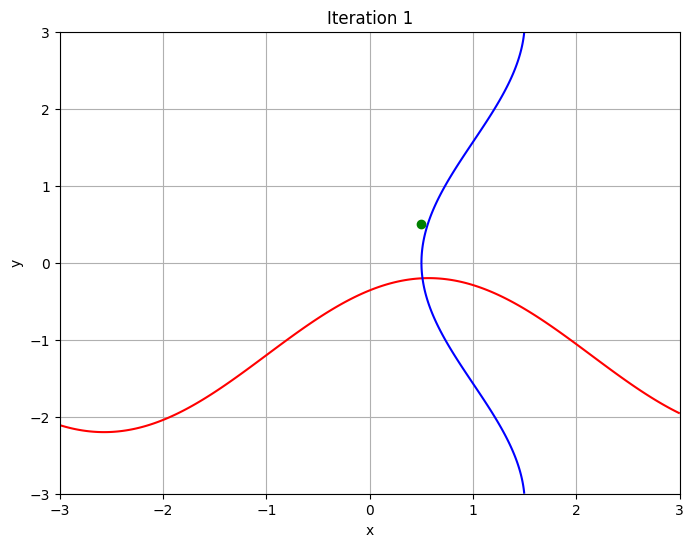

Начальное приближение: x0 = 0.5, y0 = 0.5
Матрица Якоби:
[[ 0.0707372  -1.        ]
 [ 2.         -0.47942554]]
F(x, y):
[-0.70250501 -0.12241744]
Решение линейной системы:
[-0.10903965 -0.71021817]
Новое приближение (Крамер): x = 0.39096035403895746, y = -0.21021817282206667


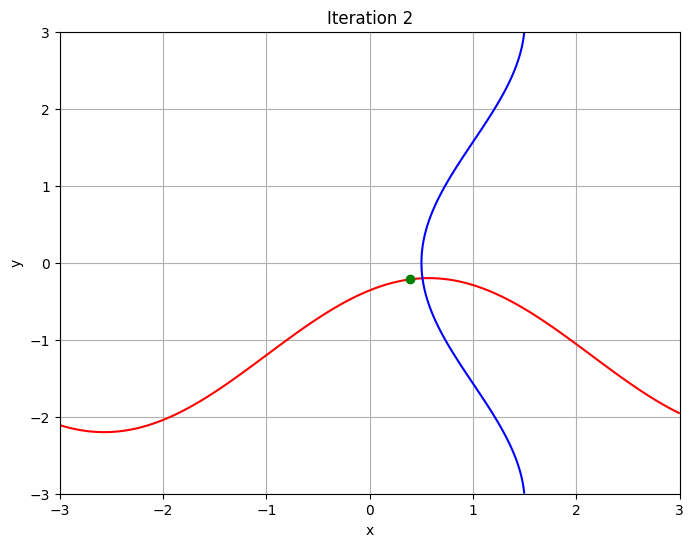

Начальное приближение: x0 = 0.39096035403895746, y0 = -0.21021817282206667
Матрица Якоби:
[[ 0.17886819 -1.        ]
 [ 2.          0.20867327]]
F(x, y):
[-0.00590878 -0.24009388]
Решение линейной системы:
[0.11845282 0.01527866]
Новое приближение (Крамер): x = 0.509413170470337, y = -0.1949395133882361


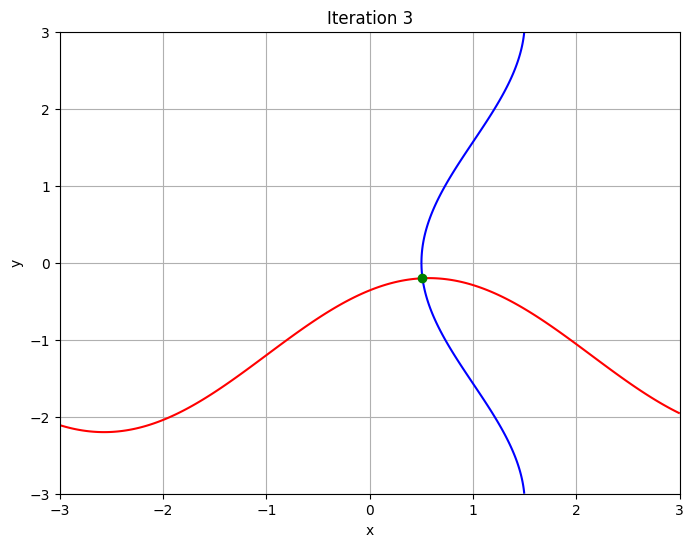

Начальное приближение: x0 = 0.509413170470337, y0 = -0.1949395133882361
Матрица Якоби:
[[ 0.06134462 -1.        ]
 [ 2.          0.19370719]]
F(x, y):
[-0.00694384 -0.00011427]
Решение линейной системы:
[ 0.00072536 -0.00689934]
Новое приближение (Крамер): x = 0.5101385322706958, y = -0.20183885743126745


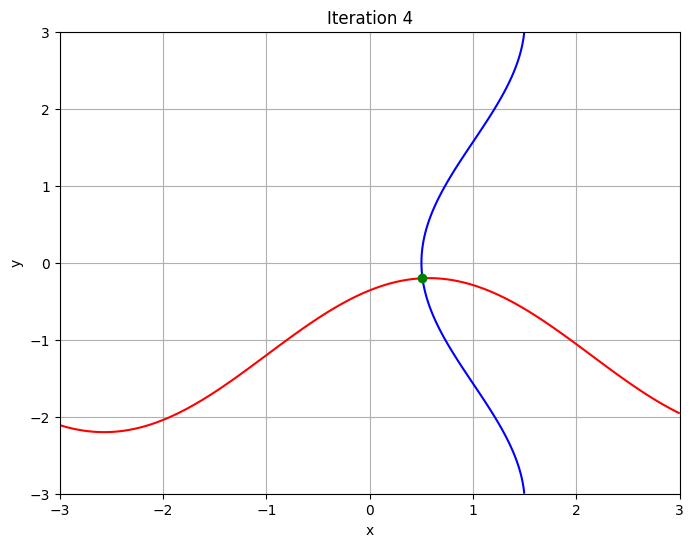

Начальное приближение: x0 = 0.5101385322706958, y0 = -0.20183885743126745
Матрица Якоби:
[[ 0.0606206 -1.       ]
 [ 2.         0.2004712]]
F(x, y):
[-2.62583298e-07 -2.33389832e-05]
Решение линейной системы:
[1.16251733e-05 4.42141731e-07]
Новое приближение (Крамер): x = 0.5101501574439725, y = -0.20183841528953622
   Iteration         x         y     x_new     y_new
0          0  0.500000  0.500000  0.390960 -0.210218
1          1  0.390960 -0.210218  0.509413 -0.194940
2          2  0.509413 -0.194940  0.510139 -0.201839
3          3  0.510139 -0.201839  0.510150 -0.201838
Решение: (0.5101501574439725, -0.20183841528953622)


In [73]:
# Определение функций
def f1(x, y):
    return np.sin(x + 1) - y - 1.2

def f2(x, y):
    return 2 * x + np.cos(y) - 2

# Производные функций
def jacobian(x, y):
    df1_dx = np.cos(x + 1)
    df1_dy = -1
    df2_dx = 2
    df2_dy = -np.sin(y)
    return np.array([[df1_dx, df1_dy], [df2_dx, df2_dy]])

# Метод Ньютона
def newton_method(x0, y0, tol=1e-3, max_iter=100):
    x, y = x0, y0
    iterations = 0
    table = []
    
    while iterations < max_iter:
        # Построение графиков функций
        plt.figure(figsize=(8, 6))
        x_vals = np.linspace(-3, 3, 400)
        y_vals = np.linspace(-3, 3, 400)
        X, Y = np.meshgrid(x_vals, y_vals)
        F1 = f1(X, Y)
        F2 = f2(X, Y)
        plt.contour(X, Y, F1, levels=[0], colors='red')
        plt.contour(X, Y, F2, levels=[0], colors='blue')
        plt.plot(x, y, 'go')  # Точка текущего приближения
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Iteration {iterations + 1}')
        plt.grid()
        plt.show()
        
        # Определение начального приближения
        print(f"Начальное приближение: x0 = {x}, y0 = {y}")
        
        J = jacobian(x, y)
        print("Матрица Якоби:")
        print(J)
        
        F = np.array([f1(x, y), f2(x, y)])
        print("F(x, y):")
        print(F)
        
        if np.linalg.det(J) == 0:
            raise ValueError("Jacobian determinant is zero. Newton's method fails.")
        
        # Составление системы линейных уравнений
        delta = np.linalg.solve(J, -F)
        print("Решение линейной системы:")
        print(delta)
        
        # Решение линейной системы методом Крамера
        delta_x, delta_y = delta[0], delta[1]
        x_new, y_new = x + delta_x, y + delta_y
        print(f"Новое приближение (Крамер): x = {x_new}, y = {y_new}")
        
        table.append([iterations, x, y, x_new, y_new])
        
        # Проверка условия сходимости
        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < tol:
            x, y = x_new, y_new
            break
        
        x, y = x_new, y_new
        iterations += 1

    df = pd.DataFrame(table, columns=['Iteration', 'x', 'y', 'x_new', 'y_new'])
    print(df)
    return x, y

# Начальное приближение
x0, y0 = 0.5, 0.5

# Решение методом Ньютона
solution = newton_method(x0, y0)
print("Решение:", solution)

# 2 блок «Численное интегрирование»

## Задание

$$
f(x) = \frac{x^3}{\sqrt{1-x^2}}
$$

### Решение

In [74]:
def f(x):
    return x**3 / math.sqrt(1 - x**2)

def f_double_prime(x):
    # Здесь определена вторая производная функции f(x)
    return (-2*x**7 + 7*x**5 - 11*x**3 + 6*x) / (math.sqrt(1 - x**2) * (1 - x**2)**3)

$$
\begin{array}{l}
\text{Найдите шаг интегрирования } h \text{ для вычисления интеграла } \int_{a}^{b} f(x) dx \text{ по формуле трапеций с точностью } \epsilon = 0.001, \\
\text{Для вычисления шага воспользуйтесь формулой }
\frac{M}{12} \left| b - a \right| h^2 < \epsilon
\text{где } M = \max \left| f''(x) \right|, \; x \in [a, b]
\end{array}
$$

Указание. Шаг h 
следует выбирать с учетом дополнительного условия: отрезок интегрирования 
должен разбиваться на число частей, кратное 4. Вычисления шага h должны 
присутствовать в лабораторной работе, в текстовом блоке. Текстовый блок 
поддерживает Latex-формулы.


In [75]:
def find_step_size(a, b, epsilon):
    M = max(abs(f_double_prime(x)) for x in (a, b))
    h = math.sqrt((12 * epsilon) / ((b - a) * M))
    # Шаг h должен быть таким, чтобы число частей, на которые разбивается отрезок [a, b], было кратно 4
    num_intervals = math.ceil((b - a) / h)
    h = (b - a) / num_intervals
    return h

a = -0.5  # Нижний предел интегрирования
b = 0.5  # Верхний предел интегрирования
epsilon = 0.001  # Заданная точность

# Находим шаг интегрирования
h = find_step_size(a, b, epsilon)
print("h =", h)

h = 0.047619047619047616


$$
\begin{array}{l}
\text{Вычислите интеграл по формуле трапеций с шагами 2h и h: } \\
\int_{a}^{b} f(x) dx \approx h\left(\frac{y_0}{2} + y_1 + y_2 + \cdots + y_n + \frac{y_n}{2}\right), \quad y_i = f(x_i) \\
\text{Дайте уточненную оценку погрешности по правилу Рунге } \Delta \approx \frac{1}{3} \left| I_n - I_{2n} \right|
\end{array}
$$

In [76]:
def trapezoidal_rule(a, b, h):
    n = int((b - a) / h)  # Количество интервалов
    result = 0.5 * (f(a) + f(b))  # Первый и последний члены в формуле трапеций
    for i in range(1, n):
        result += f(a + i * h)  # Суммируем значения функции в узлах
    result *= h
    return result

def runge_rule3(I_n, I_2n):
    return abs(I_n - I_2n) / 3

I_h = trapezoidal_rule(a, b, h)

# Вычисляем интеграл по формуле трапеций с шагом 2h
I_2h = trapezoidal_rule(a, b, 2*h)

# Оценка погрешности по правилу Рунге
delta = runge_rule3(I_h, I_2h)

print("По формуле трапеций")
print("Значение интеграла с шагом h:", I_h)
print("Значение интеграла с шагом 2h:", I_2h)
print("Уточненная оценка погрешности по правилу Рунге:", delta)

По формуле трапеций
Значение интеграла с шагом h: -3.3042351923367752e-18
Значение интеграла с шагом 2h: -0.0040995190269442275
Уточненная оценка погрешности по правилу Рунге: 0.0013665063423147414


$$
\begin{array}{l}
\text{Вычислите интеграл по формуле Симпсона с шагами 2h и h: } \\
\int_{a}^{b} f(x) dx \approx \frac{h}{3}\left(y_0 + y_{2m} + 4(y_1 + y_3 + \cdots + y_{2m-1}) + 2(y_2 + y_4 + \cdots + y_{2m-2})\right), \quad y_i = f(x_i) \\
\text{Дайте уточненную оценку погрешности по правилу Рунге для формулы Симпсона:  } \Delta \approx \frac{1}{15} \left| I_n - I_{2n} \right|
\end{array}
$$

In [77]:
def simpsons_rule(a, b, h):
    n = int((b - a) / h)  # Количество интервалов
    result = f(a) + f(b)  # Первый и последний члены в формуле Симпсона
    for i in range(1, n):
        x = a + i * h
        if i % 2 == 0:
            result += 2 * f(x)  # Четные члены
        else:
            result += 4 * f(x)  # Нечетные члены
    result *= h / 3
    return result

def runge_rule15(I_n, I_2n):
    return abs(I_n - I_2n) / 15


# Вычисляем интеграл по формуле Симпсона с шагом h
I_h = simpsons_rule(a, b, h)

# Вычисляем интеграл по формуле Симпсона с шагом 2h
I_2h = simpsons_rule(a, b, 2*h)

# Оценка погрешности по правилу Рунге
delta = runge_rule15(I_h, I_2h)

print("По формуле Симпсона")
print("Значение интеграла с шагом h:", I_h)
print("Значение интеграла с шагом 2h:", I_2h)
print("Уточненная оценка погрешности по правилу Рунге:", delta)

По формуле Симпсона
Значение интеграла с шагом h: -0.0019290051673091946
Значение интеграла с шагом 2h: -0.004583206983792939
Уточненная оценка погрешности по правилу Рунге: 0.00017694678776558297


◦ Найдите значение интеграла с помощью функций Python.

In [78]:
integral_value, error = integrate.quad(f, a, b)

print("Функция Python")
print("Значение интеграла:", integral_value)
print("Погрешность:", error)

Функция Python
Значение интеграла: 0.0
Погрешность: 3.807593392003198e-16


- Вычислите определенный интеграл по формуле Ньютона-Лейбница. (вычисления 
должны присутствовать в текстовом блоке). Сравните приближенные значения 
интеграла с точным. Какая формула численного интегрирования дала более 
точный результат?

Найдем первообразную:

$$ F(x) = \int \frac{x^3}{\sqrt{1 - x^2}} \, dx $$

Сделаем подстановку $$ u = 1 - x^2 $$ откуда $$ du = -2x \, dx $$

$$ F(x) = -\frac{1}{2} \int \frac{1}{\sqrt{u}} \, du = -\frac{1}{2} \cdot 2 \sqrt{u} + C = -\sqrt{1 - x^2} + C $$

Используем формулу Ньютона-Лейбница:

$$ \int_{-0.5}^{0.5} \frac{x^3}{\sqrt{1 - x^2}} \, dx = F(0.5) - F(-0.5) = -\sqrt{1 - (0.5)^2} + \sqrt{1 - (-0.5)^2} = -\sqrt{0.75} + \sqrt{0.75} \approx 0 $$

Таким образом, точное значение определенного интеграла $$ \int_{-0.5}^{0.5} \frac{x^3}{\sqrt{1 - x^2}} \, dx $$ равно нулю.

# 3 блок «Численные методы решения обыкновенных дифференциальных уравнений»

## Задание

$$
y' + xy = 0.5(x-1)e^x
$$
$$
y(0) = 2
$$

### Решение

Решается задача Коши
 $$
  y' = f(x, y), \quad y(a) = y_0
  $$

- Найдите шаг интегрирования h для решения задачи Коши методом Рунге-Кутта (IV) с точностью 10^{-4}:


In [79]:
# Функция для правой части уравнения
def f(y, x):
    return 0.5 * (x - 1) * np.exp(x) * y**2 - x * y

def step(x0, y0, h, epsilon):
    temp_h = h
    while True:
        y2 = y0 + temp_h * (f(x0 + temp_h, y0 + temp_h * f(x0, y0)))
        y2_tilde = y0 + temp_h * (f(x0 + 2*temp_h, y0 + 2*temp_h * f(x0, y0)))
        if abs(y2 - y2_tilde) / 15 > epsilon:
            return temp_h
        temp_h *= 2

# Определяем параметры задачи
a = 0
b = 2
x0 = 0
y0 = 2
h = 0.1
h0 = step(x0, y0, h, epsilon)
h1 = 2 * h0
x_rk_h0 = np.arange(a, b + h0, h0)
x_rk_h1 = np.arange(a, b + h1, h1)
print("Шаг интегрирования h для метода Рунге-Кутта:", h)

Шаг интегрирования h для метода Рунге-Кутта: 0.1



-  Найти решение задачи Коши на отрезке [a,b] методом Рунге-Кутта (IV) с точностью до 10^{-4}. Построить приближенную интегральную кривую

  $$
  y_{k+1} = y_k + \frac{h}{6} (F_1 + 2F_2 + 2F_3 + F_4)
  $$

  $$
  F_1 = f(x_k, y_k)
  $$

  $$
  F_2 = f(x_k + \frac{h}{2}, y_k + \frac{h}{2} F_1)
  $$

  $$
  F_3 = f(x_k + \frac{h}{2}, y_k + \frac{h}{2} F_2)
  $$

  $$
  F_4 = f(x_k + h, y_k + h F_3)
  $$

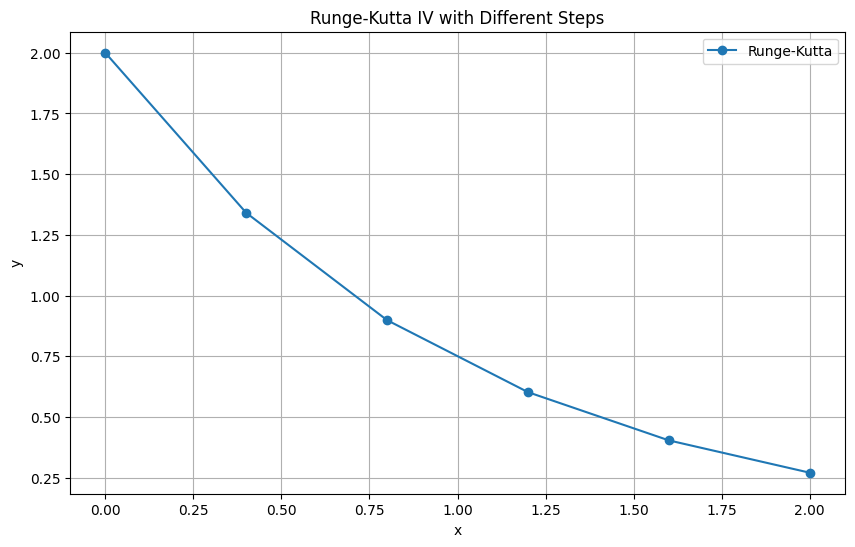

Table for Runge-Kutta Method:
     x         y   y_tilda     delta
0  0.0  2.000000  2.000000  0.000000
1  0.4  1.341037  1.450191  0.007277
2  0.8  0.898942  0.900383  0.000096
3  1.2  0.602575  0.652593  0.003335
4  1.6  0.403956  0.404804  0.000057
5  2.0  0.270860  0.294596  0.001582


In [80]:
# Решение задачи методом Рунге-Кутта IV
def runge_kutta_4(f, y0, x):
    n = len(x)
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        h = x[i] - x[i - 1]
        k1 = f(y[i - 1], x[i - 1])
        k2 = f(y[i - 1] + h / 2 * k1, x[i - 1] + h / 2)
        k3 = f(y[i - 1] + h / 2 * k2, x[i - 1] + h / 2)
        k4 = f(y[i - 1] + h * k3, x[i])
        y[i] = y[i - 1] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

# Решение методом Рунге-Кутта IV с шагами h0 и h1
y_rk_h0 = runge_kutta_4(f, y0, x_rk_h0)
y_rk_h1 = runge_kutta_4(f, y0, x_rk_h1)

# Интерполяция значений y_rk_h1 на сетке x_rk_h0 для вычисления delta
y_rk_h1_interp = np.interp(x_rk_h0, x_rk_h1, y_rk_h1)
delta_rk = np.abs(y_rk_h0 - y_rk_h1_interp) / 15

# Создание таблицы для метода Рунге-Кутта IV
data_rk = {
    "x": x_rk_h0,
    "y": y_rk_h0,
    "y_tilda": y_rk_h1_interp,
    "delta": delta_rk
}
df_rk = pd.DataFrame(data_rk)

# График для метода Рунге-Кутты IV
plt.figure(figsize=(10, 6))
plt.plot(x_rk_h0, y_rk_h0, 'o-', label='Runge-Kutta')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Runge-Kutta IV with Different Steps')
plt.legend()
plt.grid(True)
plt.show()

# Таблица для метода Рунге-Кутты IV
print("Table for Runge-Kutta Method:")
print(df_rk)

- Найти решение задачи Коши на отрезке [a, b] методом Эйлера:
  $$
  y_{k+1} = y_k + h f(x_k, y_k)
  $$
  Построить приближенную интегральную кривую на одном графике с предыдущим пунктом.


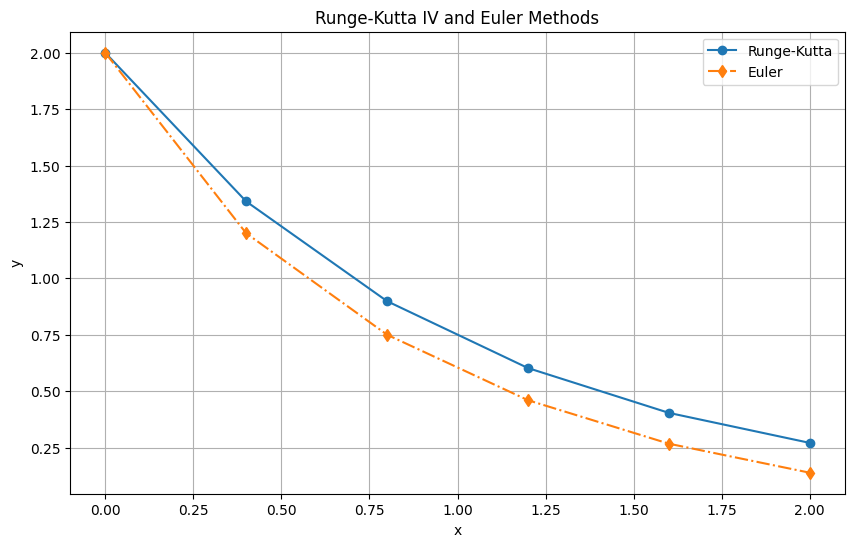


Table for Euler Method:
     x      y_eu  ytilda_eu     delta
0  0.0  2.000000   2.000000  0.000000
1  0.4  1.200000   1.340640  0.009376
2  0.8  0.750213   0.898658  0.009896
3  1.2  0.460042   0.602388  0.009490
4  1.6  0.267328   0.403793  0.009098
5  2.0  0.138714   0.270671  0.008797


In [81]:
# Решение методом Эйлера
def euler_method(f, y0, x):
    n = len(x)
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        h = x[i] - x[i - 1]
        y[i] = y[i - 1] + h * f(y[i - 1], x[i - 1])
    return y

# Решение методом Эйлера с шагом h0
y_euler_h0 = euler_method(f, y0, x_rk_h0)
# Интерполяция значений точного решения на сетке x_rk_h0 для вычисления delta
delta_euler = np.abs(y_euler_h0 - y_exact) / 15

# Создание таблицы для метода Эйлера
data_euler = {
    "x": x_rk_h0,
    "y_eu": y_euler_h0,
    "ytilda_eu": y_exact,
    "delta": delta_euler
}
df_euler = pd.DataFrame(data_euler)

# График для методов Рунге-Кутты IV и Эйлера
plt.figure(figsize=(10, 6))
plt.plot(x_rk_h0, y_rk_h0, 'o-', label='Runge-Kutta')
plt.plot(x_rk_h0, y_euler_h0, 'd-.', label='Euler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Runge-Kutta IV and Euler Methods')
plt.legend()
plt.grid(True)
plt.show()

# Таблица для метода Эйлера
print("\nTable for Euler Method:")
print(df_euler)


- Найти решение задачи Коши с помощью функций Python.

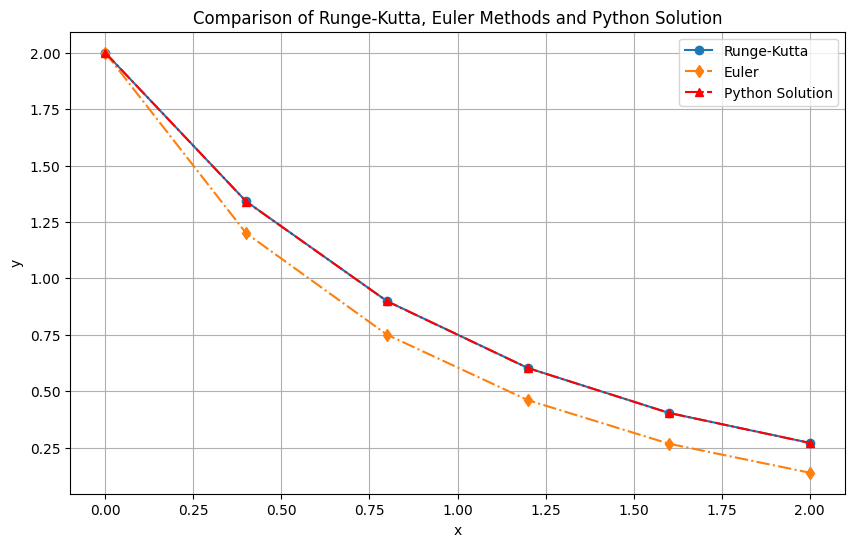


Comparison Table:
     x     Euler  Runge-Kutta    Python
0  0.0  2.000000     2.000000  2.000000
1  0.4  1.200000     1.341037  1.340640
2  0.8  0.750213     0.898942  0.898658
3  1.2  0.460042     0.602575  0.602388
4  1.6  0.267328     0.403956  0.403793
5  2.0  0.138714     0.270860  0.270671


In [82]:
# Решение задачи методом odeint для точного решения
y_exact = odeint(f, y0, x_rk_h0).flatten()

comparison_data = {
    "x": x_rk_h0,
    "Euler": y_euler_h0,
    "Runge-Kutta": y_rk_h0,
    "Python": y_exact,
}
df_comparison = pd.DataFrame(comparison_data)

# График для методов Рунге-Кутты IV, Эйлера и точного решения
plt.figure(figsize=(10, 6))
plt.plot(x_rk_h0, y_rk_h0, 'o-', label='Runge-Kutta')
plt.plot(x_rk_h0, y_euler_h0, 'd-.', label='Euler')
plt.plot(x_rk_h0, y_exact, '^-.', label='Python Solution', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Runge-Kutta, Euler Methods and Python Solution')
plt.legend()
plt.grid(True)
plt.show()

# Таблица для сравнения всех методов
print("\nComparison Table:")
print(df_comparison)

- Найти точное решение задачи Коши.

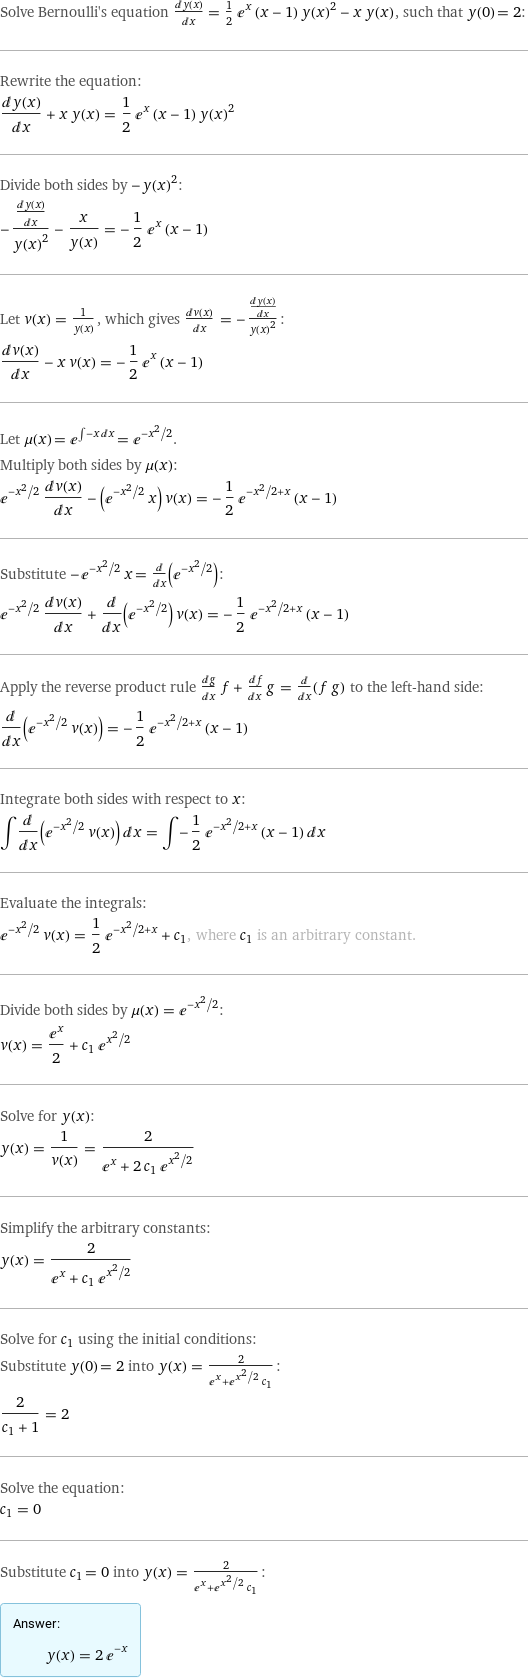